In [1]:
#Importing the required libraries
%matplotlib inline
import pandas as pd   
import matplotlib     
import matplotlib.pyplot as plt
import numpy as np  
from keras.models import Sequential 
from keras.layers import Dense     
from keras.callbacks import EarlyStopping 
from keras.utils import np_utils

F:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Reading the training data set
train = pd.read_csv('train.csv')
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [3]:
train.describe() #Data is clean with no null entries

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_label = np.array(train['label']) #Separating Label data for target set
train_label_categorical = np_utils.to_categorical(train_label)  #Just like OneHotEncoding of sklearn for better classification
train = np.array(train.drop(['label'],axis=1))   #Dropping the target data set
train_label_categorical.shape

(42000, 10)

In [6]:
random_digit = train[40000]   #Viewing one of the data 
type(random_digit)

numpy.ndarray

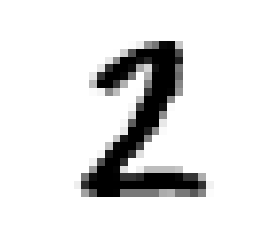

In [7]:
random_digit = random_digit.reshape(28,28)              #Reshaping to 28*28 matrix
plt.imshow(random_digit,cmap = matplotlib.cm.binary)    #Plotting the data
plt.axis('off')
plt.show()

In [8]:
train = train.astype('float32') #Converting to float for normalizing the data
train = train/255    #Normalizing to reduce variance

In [9]:
n_cols = train.shape[1]   #number of columns/features

In [10]:
early_stopping = EarlyStopping(patience=2)  #Stopping the training of model when there will be no improvements for 2 rounds

In [11]:
#Building the neural network
model = Sequential()    #Neural Network Type
model.add(Dense(n_cols+100,activation='relu',input_shape=(n_cols,)))   #Hidden Layer
model.add(Dense(10,activation='softmax'))   #Output Layer

In [12]:
#compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])  #Model Compilation

In [13]:
#Fitting the model
model.fit(train,train_label_categorical,validation_data=(train,train_label_categorical),epochs=25,callbacks=[early_stopping],batch_size=200, verbose=2)

Train on 42000 samples, validate on 42000 samples
Epoch 1/25
 - 5s - loss: 0.3122 - acc: 0.9123 - val_loss: 0.1544 - val_acc: 0.9568
Epoch 2/25
 - 5s - loss: 0.1255 - acc: 0.9644 - val_loss: 0.0958 - val_acc: 0.9717
Epoch 3/25
 - 5s - loss: 0.0827 - acc: 0.9756 - val_loss: 0.0563 - val_acc: 0.9850
Epoch 4/25
 - 5s - loss: 0.0579 - acc: 0.9838 - val_loss: 0.0406 - val_acc: 0.9898
Epoch 5/25
 - 5s - loss: 0.0419 - acc: 0.9888 - val_loss: 0.0347 - val_acc: 0.9906
Epoch 6/25
 - 5s - loss: 0.0319 - acc: 0.9910 - val_loss: 0.0204 - val_acc: 0.9959
Epoch 7/25
 - 5s - loss: 0.0227 - acc: 0.9944 - val_loss: 0.0161 - val_acc: 0.9971
Epoch 8/25
 - 5s - loss: 0.0158 - acc: 0.9969 - val_loss: 0.0136 - val_acc: 0.9975
Epoch 9/25
 - 5s - loss: 0.0124 - acc: 0.9975 - val_loss: 0.0096 - val_acc: 0.9984
Epoch 10/25
 - 5s - loss: 0.0089 - acc: 0.9987 - val_loss: 0.0069 - val_acc: 0.9993
Epoch 11/25
 - 5s - loss: 0.0073 - acc: 0.9987 - val_loss: 0.0056 - val_acc: 0.9995
Epoch 12/25
 - 5s - loss: 0.0051 - 

In [14]:
test = pd.read_csv('test.csv')  #Reading the test data and normalizing as in train data
test = test.astype('float32')
test = np.array(test/255)

In [15]:
#Predicting the values
predicted_values = model.predict(test)

In [16]:
predicted_values  #Values are the predictions for each of the 9 features so a data manipulation will be performed

array([[3.27386016e-16, 6.93820745e-20, 1.00000000e+00, ...,
        4.35515166e-11, 1.28037172e-15, 2.13045413e-17],
       [9.99984026e-01, 6.98762881e-10, 4.09787333e-08, ...,
        5.05787739e-06, 8.84121335e-14, 2.53920669e-11],
       [2.09294160e-09, 5.74232763e-06, 1.30497183e-05, ...,
        1.50557862e-05, 3.74600757e-04, 9.98806834e-01],
       ...,
       [3.53225402e-15, 1.52234860e-14, 8.08312445e-12, ...,
        4.58464748e-14, 1.41048520e-10, 2.05330597e-09],
       [2.30394714e-11, 2.67516776e-13, 5.64307524e-11, ...,
        2.06421731e-07, 6.25172047e-09, 9.99964118e-01],
       [1.01222445e-14, 2.11757244e-16, 1.00000000e+00, ...,
        7.67266133e-13, 1.13554904e-13, 3.34384701e-13]], dtype=float32)

In [17]:
zero_mat = np.zeros_like(predicted_values)  #Buidling a zero matrix similar to prediction matrix

In [18]:
zero_mat[np.arange(len(predicted_values)), predicted_values.argmax(1)] = 1  #Finding the max value for each prediction and making it 1 and rest are filled with 0

In [19]:
zero_mat  #Now the data looks good


array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [20]:
np.count_nonzero(zero_mat == 1)  #Number of 1 is equal to 28000 which means there is a prediction for each row

28000

In [21]:
pred_val = pd.DataFrame(zero_mat).astype('int32')   #converting the matrix to integer
pred_val.head()

,0,1,2,3,4,5,6,7,8,9
0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0


In [22]:
Label = pred_val.idxmax(axis=1)  #Chaning all the binary columns to a single categorical column
ImageId = np.arange(1,28001)

In [23]:
final_pred_val = pd.DataFrame({'ImageId': ImageId, 'Label': Label}, columns=['ImageId', 'Label'])   #Building the final DataFrame

In [24]:
final_pred_val.head()  #Data looks clean

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [25]:
final_pred_val.to_csv('final_predict_nn.csv',index=False)  #Parsing data to csv file